<a href="https://colab.research.google.com/github/Pawan12345kr/WeldRight_Project-IITB/blob/main/WeldRight_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WeldRight Round-2
Team id: **HA-226439**

Team Members -
1.   **Shreyas Kumar Tah**
2.  **Pawan Kumar**

Link for Documentation [Click Here](https://docs.google.com/document/d/1m3vKp1ZHe_2UF7VQ8D0evyv98GByNMen4EXuFWajSsU/edit?usp=sharing)



In [ ]:
#Mathematical Libraries
import pandas as pd
import numpy as np

#Visulization Tools
import matplotlib.pyplot as plt
import seaborn as sns

#Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

#Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import f1_score


## **LOADING DATA**

In [ ]:
!wget https://github.com/skt-shreyas/WeldRight/blob/main/WeldRight_Dataset_csv.zip?raw=true

--2022-12-12 10:13:16--  https://github.com/skt-shreyas/WeldRight/blob/main/WeldRight_Dataset_csv.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/skt-shreyas/WeldRight/raw/main/WeldRight_Dataset_csv.zip [following]
--2022-12-12 10:13:16--  https://github.com/skt-shreyas/WeldRight/raw/main/WeldRight_Dataset_csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/skt-shreyas/WeldRight/main/WeldRight_Dataset_csv.zip [following]
--2022-12-12 10:13:17--  https://raw.githubusercontent.com/skt-shreyas/WeldRight/main/WeldRight_Dataset_csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [ ]:
import zipfile

In [ ]:
!unzip WeldRight_Dataset_csv.zip?raw=true

Archive:  WeldRight_Dataset_csv.zip?raw=true
  inflating: WeldRight Dataset_csv.csv  


In [ ]:
dataset= pd.read_csv('/content/WeldRight Dataset_csv.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2,3,6,7,8,9,10,11,22,27,32,37,42,47,52,57,62,67,72,77,82,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset.head(10)

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,(Office id of employee),(Welding machine name),(Project order number),(This captures the activity to be performed by...,(date of activity),(Timestamp for the activity),(In Ampere),(Relative humidity in %),(in degree celsius),(in liters per min (LPM)),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,382617,TWLD23,E15002965,240,10-09-2022,7:32:28:527,1.13,74,23,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:40,1.82,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:677,2.91,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:166,0.04,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:696,2.51,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,382617,TWLD23,E15002965,240,10-09-2022,7:32:31:286,0.24,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,382617,TWLD23,E15002965,240,10-09-2022,7:32:31:786,-0.9,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,382617,TWLD23,E15002965,240,10-09-2022,7:32:32:390,2.61,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,382617,TWLD23,E15002965,240,10-09-2022,7:32:27:884,10.51,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.columns

Index(['Employee Code', 'Machine', 'Production', 'Order Operation No', 'Date',
       'Time', 'Current', 'Humidity', 'Temperature', 'Flow', 'Job Temp',
       'Voltage', 'Defect', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', '

## **DATA CLEANING**


In [ ]:
#Unnecessarily "unnamed" columns are removed

dataset_1 = dataset.iloc[1:,0:13]

In [ ]:
dataset_1.head(10)

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,382617,TWLD23,E15002965,240,10-09-2022,7:32:28:527,1.13,74,23,0.01,29.3,15.2,No Defect
2,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:40,1.82,74,23,0,29.3,0,Tungsten Inclusion
3,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:677,2.91,74,23,0,29.3,0,No Defect
4,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:166,0.04,74,23,0,29.3,0,No Defect
5,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:696,2.51,74,23,0,27.8,0,No Defect
6,382617,TWLD23,E15002965,240,10-09-2022,7:32:31:286,0.24,74,23,0,27.8,0,No Defect
7,382617,TWLD23,E15002965,240,10-09-2022,7:32:31:786,-0.9,74,23,0,27.8,0,No Defect
8,382617,TWLD23,E15002965,240,10-09-2022,7:32:32:390,2.61,74,23,0,28,0,No Defect
9,382617,TWLD23,E15002965,240,10-09-2022,7:32:27:884,10.51,74,23,0,28,9.062,No Defect
10,382617,TWLD23,E15002965,240,10-09-2022,7:32:32:949,2.35,74,23,0,28,0,No Defect


In [ ]:
dataset_1.shape

(827534, 13)

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827534 entries, 1 to 827534
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Employee Code       827534 non-null  object
 1   Machine             827534 non-null  object
 2   Production          827534 non-null  object
 3   Order Operation No  827534 non-null  object
 4   Date                827534 non-null  object
 5   Time                827534 non-null  object
 6   Current             827531 non-null  object
 7   Humidity            827534 non-null  object
 8   Temperature         827534 non-null  object
 9   Flow                827534 non-null  object
 10  Job Temp            827534 non-null  object
 11  Voltage             827534 non-null  object
 12  Defect              827534 non-null  object
dtypes: object(13)
memory usage: 82.1+ MB


In [ ]:
dataset_1.describe()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
count,827534,827534,827534,827534,827534,827534,827531.00,827534,827534,827534.0,827534.0,827534.0,827534
unique,10,1,24,12,24,821555,8926.00,65,26,1022.0,1410.0,14266.0,52
top,391342,TWLD23,E15003244,240,14-09-2022,14:22:47:641,10.11,78,24,0.0,31.2,0.0,No Defect
freq,256884,827534,194726,476273,91059,3,10184.00,77495,358943,250303.0,62114.0,572551.0,819552


In [ ]:
#Number of Missing Values
dataset_1.isnull().sum()

Employee Code         0
Machine               0
Production            0
Order Operation No    0
Date                  0
Time                  0
Current               3
Humidity              0
Temperature           0
Flow                  0
Job Temp              0
Voltage               0
Defect                0
dtype: int64

Current column has **3** missing values

In [ ]:
# Dropping missing data
dataset_2 = dataset_1.dropna()
dataset_2.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,382617,TWLD23,E15002965,240,10-09-2022,7:32:28:527,1.13,74,23,0.01,29.3,15.2,No Defect
2,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:40,1.82,74,23,0,29.3,0,Tungsten Inclusion
3,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:677,2.91,74,23,0,29.3,0,No Defect
4,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:166,0.04,74,23,0,29.3,0,No Defect
5,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:696,2.51,74,23,0,27.8,0,No Defect


In [ ]:
# Checking length of dataset_1 and dataset_2
len(dataset_1), len(dataset_2)

(827534, 827531)

In [ ]:
dataset_2.isnull().sum()

Employee Code         0
Machine               0
Production            0
Order Operation No    0
Date                  0
Time                  0
Current               0
Humidity              0
Temperature           0
Flow                  0
Job Temp              0
Voltage               0
Defect                0
dtype: int64

In [ ]:
dataset_2.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,382617,TWLD23,E15002965,240,10-09-2022,7:32:28:527,1.13,74,23,0.01,29.3,15.2,No Defect
2,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:40,1.82,74,23,0,29.3,0,Tungsten Inclusion
3,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:677,2.91,74,23,0,29.3,0,No Defect
4,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:166,0.04,74,23,0,29.3,0,No Defect
5,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:696,2.51,74,23,0,27.8,0,No Defect


### *Data Cleaning in **Employee Code** Column*



In [ ]:
dataset_2["Employee Code"].unique()

array(['382617', 382617, 391342, 97346, 0, 394965, 387268, 394365, 383138,
       394269], dtype=object)

In [ ]:
dataset_2['Employee Code'].value_counts()

391342    256882
394965    174984
97346     117426
394269    114821
0          66820
382617     28574
383138     27295
394365     23922
387268      8616
382617      8191
Name: Employee Code, dtype: int64

In [ ]:
dataset_2['Employee Code']=dataset_2['Employee Code'].astype(int)

<ipython-input-20-9f6d27474d0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Employee Code']=dataset_2['Employee Code'].astype(int)


In [ ]:
#Removing the column values=0 as employee code cannot be 0.

dataset_2.drop(dataset_2.loc[dataset_2['Employee Code']==0].index, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#around 66823 datas from the datasets are dropped

len(dataset_2), len(dataset_1)

(760711, 827534)

In [ ]:
dataset_2['Employee Code'].value_counts()

391342    256882
394965    174984
97346     117426
394269    114821
382617     36765
383138     27295
394365     23922
387268      8616
Name: Employee Code, dtype: int64

In [ ]:
# checking again Employee Code with zero
len(dataset_2[dataset_2["Employee Code"]=="0"])

0

In [ ]:
# changing Employee Code values of 97346 to 397346
dataset_2.replace({"Employee Code":{97346: 397346}}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
dataset_2['Employee Code'].value_counts()

391342    256882
394965    174984
397346    117426
394269    114821
382617     36765
383138     27295
394365     23922
387268      8616
Name: Employee Code, dtype: int64

### *Data Cleaning in **Machine** Column*




In [ ]:
dataset_2["Machine"].unique()


array(['TWLD23'], dtype=object)

In [ ]:
dataset_2['Machine'].value_counts()

TWLD23    760711
Name: Machine, dtype: int64

### *Data Cleaning in **Production** Column*

In [ ]:
dataset_2["Production"].unique()

array(['E15002965', 'E15002966', 'E15003253', '-', 'E52009694',
       'E15003244', 'E15003208', '15003062', 'E15003220', 'E15002881',
       'E10002436', 'E50006711', 'E15003200', 'E15003202', 'E15003056',
       'E15002963', 'E10002437', 'E15003219', 'E15003201', 'Test coopan',
       '-15003217', -15003217, -150033027, 15003062], dtype=object)

In [ ]:
dataset_2['Production'].value_counts()

E15003244      150015
E15003208       64481
Test coopan     62184
E15003202       49607
-15003217       47337
E15002881       46235
E15002966       44189
-150033027      43272
E15003200       40890
E15003219       29137
E15003220       24526
E15003201       24411
E10002437       20787
E52009694       17658
15003062        16029
E50006711       15473
E15002963       14979
E10002436       14761
E15003056       10617
E15002965       10153
15003062         6863
-15003217        5901
-                 740
E15003253         466
Name: Production, dtype: int64

In [ ]:
#removing Production values like 'test coupan', '-' which are not useful.

dataset_2.drop(dataset_2.loc[dataset_2['Production']==('Test coopan')].index, inplace=True)
dataset_2.drop(dataset_2.loc[dataset_2['Production']==('-')].index, inplace=True)


In [ ]:
dataset_2.replace({'Production':{'-15003217':'E15003217'}}, inplace=True)
dataset_2.replace({'Production':{-15003217:'E15003217'}}, inplace=True)
dataset_2.replace({'Production':{-150033027:'E150033027'}}, inplace=True)
dataset_2.replace({'Production':{15003062:'E15003062'}}, inplace=True)
dataset_2.replace({'Production':{'15003062':'E15003062'}}, inplace=True)


In [ ]:
dataset_2['Production'].value_counts()

E15003244     150015
E15003208      64481
E15003217      53238
E15003202      49607
E15002881      46235
E15002966      44189
E150033027     43272
E15003200      40890
E15003219      29137
E15003220      24526
E15003201      24411
E15003062      22892
E10002437      20787
E52009694      17658
E50006711      15473
E15002963      14979
E10002436      14761
E15003056      10617
E15002965      10153
E15003253        466
Name: Production, dtype: int64

### *Data Cleaning in **Order Operation No** Column*

In [ ]:
dataset_2["Order Operation No"].unique()

array(['240', 240, '-240', '130', 130, 180, 40, 30, '180-'], dtype=object)

In [ ]:
dataset_2['Order Operation No'].value_counts()

240     431561
180     128646
180-     53238
40       35548
130      16712
30       15473
240      15197
130        946
-240       466
Name: Order Operation No, dtype: int64

In [ ]:
dataset_2.replace({'Order Operation No':{'240':240 ,'180-':180 , '130':130 , '-240':240 }}, inplace=True)

In [ ]:
dataset_2['Order Operation No'].value_counts()

240    447224
180    181884
40      35548
130     17658
30      15473
Name: Order Operation No, dtype: int64

In [ ]:
dataset_2['Order Operation No']=dataset_2['Order Operation No'].astype(int)

<ipython-input-38-8017900e7b6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Order Operation No']=dataset_2['Order Operation No'].astype(int)


### *Data Cleaning in **Date** Column*

In [ ]:
dataset_2["Date"].unique()

array(['10-09-2022', '12-09-2022', '13-09-2022', '14-09-2022',
       '15-09-2022', '16-09-2022', '17-09-2022', '19-09-2022',
       '30-08-2022', '01-09-2022', '02-09-2022', '03-09-2022',
       '05-09-2022', '06-09-2022', '07-09-2022', '08-09-2022',
       '09-09-2022', '22-08-2022', '23-08-2022', '26-08-2022',
       '27-08-2022', '29-08-2022'], dtype=object)

In [ ]:
dataset_2['Date'].value_counts()

06-09-2022    49879
14-09-2022    47698
07-09-2022    47587
08-09-2022    42636
26-08-2022    42282
10-09-2022    40992
16-09-2022    40187
29-08-2022    38332
15-09-2022    34591
05-09-2022    34100
19-09-2022    32315
17-09-2022    32166
27-08-2022    31925
09-09-2022    31699
12-09-2022    31474
03-09-2022    27593
13-09-2022    27539
01-09-2022    24855
30-08-2022    18165
02-09-2022    10682
22-08-2022     9202
23-08-2022     1888
Name: Date, dtype: int64

### *Data Cleaning in **Current** Column*

In [ ]:
dataset_2["Current"].unique()

array(['1.13', '1.82', '2.91', ..., 80.26, 77.9, 79.33], dtype=object)

In [ ]:
dataset_2["Current"].value_counts()

10.11    10164
0.43      1715
0.4       1670
0.55      1661
0.51      1625
         ...  
36.3         1
29.85        1
28.46        1
4            1
79.33        1
Name: Current, Length: 8915, dtype: int64

In [ ]:
dataset_2.drop(dataset_2.loc[dataset_2['Current']==0].index, inplace=True)

In [ ]:
dataset_2['Current']=dataset_2['Current'].astype(float)

<ipython-input-44-e9731fafa390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Current']=dataset_2['Current'].astype(float)


### *Data Cleaning in **Humidity** Column*

In [ ]:
dataset_2["Humidity"].unique()

array(['74', '73', '72', '71', '77', '76', '78', '0', '79', '80', '81',
       '82', 78, 77, 79, 80, 64, 0, 76, 99, 75, 73, 72, 74, 81, 82, 83,
       85, 84, 171, 2444, 86, 87, 88, 158, 52, 71, 70, 69, 40, 68, 67, 90,
       66, 63, 62, 65, 61, 60, 59, 53, 39, 149, 58, 56, 89, 314, 38, 37,
       30, 33, 31, 118, 57], dtype=object)

In [ ]:
dataset_2["Humidity"].value_counts()

78     72819
77     68028
76     64170
79     48333
75     46742
       ...  
30         3
171        3
31         3
76         3
56         1
Name: Humidity, Length: 64, dtype: int64

In [ ]:
dataset_2['Humidity']=dataset_2['Humidity'].astype(int)

<ipython-input-47-b8a1334c1384>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Humidity']=dataset_2['Humidity'].astype(int)


### *Data Cleaning in **Flow** Column*


In [ ]:
dataset_2["Flow"].unique()

array(['0.01', '0', '0.04', ..., 9.67, 9.74, 10.17], dtype=object)

In [ ]:
dataset_2["Flow"].value_counts()

0.0      174770
0.01       7419
0          6871
0.02       6318
0.03       5401
          ...  
5.85          1
5.89          1
12.69         1
6.79          1
5.8           1
Name: Flow, Length: 1022, dtype: int64

In [ ]:
dataset_2['Flow']=dataset_2['Flow'].astype(float)

<ipython-input-50-9d04bc4bb7b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Flow']=dataset_2['Flow'].astype(float)


### *Data Cleaning in **Job Type** Column*

In [ ]:
dataset_2["Job Temp"].unique()

array(['29.3', '27.8', '28', ..., 1635.9, 100.3, 3274.9], dtype=object)

In [ ]:
dataset_2["Job Temp"].value_counts()

31.2      61543
56.8      34369
30.9      10279
30.6      10089
30.7      10003
          ...  
204.5         1
3270.3        1
200.3         1
797.6         1
50.7          1
Name: Job Temp, Length: 1373, dtype: int64

In [ ]:
dataset_2['Job Temp']=dataset_2['Job Temp'].astype(float)

<ipython-input-53-54ca7e49f47d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Job Temp']=dataset_2['Job Temp'].astype(float)


### *Data Cleaning in **Voltage** Column*

In [ ]:
dataset_2["Voltage"].unique()

array(['15.2', '0', '9.062', ..., 24.137, 20.095, 5.896], dtype=object)

In [ ]:
dataset_2['Voltage']=dataset_2['Voltage'].astype(float)

<ipython-input-55-3906a40e5952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Voltage']=dataset_2['Voltage'].astype(float)


In [ ]:
dataset_2["Voltage"].value_counts()

 0.000     470906
 12.408      3738
 11.874       440
 9.235        214
 8.948        205
            ...  
-0.340          1
 3.542          1
 16.174         1
 13.352         1
 5.896          1
Name: Voltage, Length: 12252, dtype: int64

In [ ]:
dataset_2.replace({'Voltage':{0:0.0}}, inplace=True)
dataset_2.replace({'Voltage':{'0':0.0}}, inplace=True)

In [ ]:
dataset_2["Voltage"].value_counts()

 0.000     470906
 12.408      3738
 11.874       440
 9.235        214
 8.948        205
            ...  
-0.340          1
 3.542          1
 16.174         1
 13.352         1
 5.896          1
Name: Voltage, Length: 12252, dtype: int64

### *Data Cleaning in **Temperature** Column*

In [ ]:
dataset_2["Temperature"].unique()

array(['23', '0', '24', 23, 24, 129, 12, 0, 25, 26, 50, 828, 31, -12, 27,
       48, 22, -13, 54, 13, 64, 96, 21, -11, 11, 49], dtype=object)

In [ ]:
dataset_2["Temperature"].value_counts()

24     303951
25     200219
23     108991
26      43049
22      15943
23       7483
27       7311
0        6873
21       1390
24        699
-13       436
129       172
12         33
-12         9
0           9
-11         8
828         4
13          4
96          4
11          4
49          4
48          3
31          3
54          3
50          3
64          1
Name: Temperature, dtype: int64

In [ ]:
dataset_2['Temperature']=dataset_2['Temperature'].astype(int)

<ipython-input-61-5e824f45f23b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Temperature']=dataset_2['Temperature'].astype(int)


### *Data Cleaning in **Defect** Column*

In [ ]:
dataset_2["Defect"].unique()

array(['No Defect', 'Tungsten Inclusion', 'No Defect73',
       'Tungsten Inclusion72', 'No Defect72', 'No Defect77',
       'No Defect79', 'No Defect80', 'Porosity', 'No Defect78',
       'No Defect76', 'No Defect0', 'No Defect82', 'No Defect85',
       'No Defect84', 'No Defect83', 'No Defect81', 'No Defect75',
       'No Defect86', 'Porosity86', 'No Defect87', 'Tungsten Inclusion78',
       'No Defect74', 'No Defect99', 'Porosity75', 'Tungsten Inclusion77',
       'No Defect71', 'No Defect40', 'Porosity80', 'No Defect70',
       'No Defect68', 'No Defect90', 'Tungsten Inclusion80',
       'No Defect69', 'No Defect67', 'No Defect63', 'No Defect64',
       'No Defect65', 'No Defect62', 'No Defect61', 'No Defect60',
       'No Defect59', 'Porosity76', 'No Defect66', 'Tungsten Inclusion71',
       'No Defect88', 'Tungsten Inclusion67', 'Tungsten Inclusion75',
       'Tungsten Inclusion76', 'Porosity71', 'No Defect58', 'No Defect57'],
      dtype=object)

In [ ]:
dataset_2["Defect"].value_counts()

No Defect               689539
Tungsten Inclusion        4206
Porosity                   976
No Defect77                204
No Defect78                199
No Defect76                144
No Defect79                130
No Defect80                105
No Defect75                 96
No Defect81                 92
No Defect0                  86
No Defect72                 79
No Defect73                 78
No Defect71                 75
No Defect67                 59
No Defect65                 51
No Defect70                 49
No Defect83                 48
No Defect74                 47
No Defect68                 46
No Defect66                 40
No Defect69                 37
No Defect82                 37
No Defect64                 31
No Defect84                 25
No Defect63                 24
No Defect85                 21
No Defect61                 15
No Defect58                  9
No Defect62                  7
No Defect87                  7
No Defect86                  7
No Defec

In [ ]:
dataset_2.replace({'Defect':{'No Defect77':'No Defect',
                    'No Defect77':'No Defect','No Defect67':'No Defect',
                    'No Defect78':'No Defect','No Defect71':'No Defect',
                    'No Defect79':'No Defect','No Defect73':'No Defect',
                    'No Defect59':'No Defect','No Defect72':'No Defect',
                    'No Defect60':'No Defect','No Defect0':'No Defect',
                    'No Defect57':'No Defect','No Defect81':'No Defect',
                    'No Defect90':'No Defect','No Defect75':'No Defect',
                    'No Defect86':'No Defect','No Defect80':'No Defect',
                    'No Defect87':'No Defect','No Defect88':'No Defect',
                    'No Defect62':'No Defect','No Defect76':'No Defect',
                    'No Defect58':'No Defect','No Defect40':'No Defect',
                    'No Defect61':'No Defect','No Defect99':'No Defect',
                    'No Defect85':'No Defect','Tungsten Inclusion78':'Tungsten Inclusion',
                    'No Defect63':'No Defect','Tungsten Inclusion77':'Tungsten Inclusion',
                    'No Defect84':'No Defect','Tungsten Inclusion72':'Tungsten Inclusion',
                    'No Defect64':'No Defect','Tungsten Inclusion80':'Tungsten Inclusion',
                    'No Defect82':'No Defect','Tungsten Inclusion71':'Tungsten Inclusion',
                    'No Defect69':'No Defect','Tungsten Inclusion67':'Tungsten Inclusion',
                    'No Defect66':'No Defect','Tungsten Inclusion75':'Tungsten Inclusion',
                    'No Defect68':'No Defect','Tungsten Inclusion76':'Tungsten Inclusion',
                    'No Defect74':'No Defect','Porosity86':'Porosity',
                    'No Defect83':'No Defect','Porosity75':'Porosity',
                    'No Defect70':'No Defect','Porosity80':'Porosity',
                    'No Defect65':'No Defect','Porosity76':'Porosity',
                    'Porosity71':'Porosity',


                  }}, inplace=True)

In [ ]:
dataset_2["Defect"].value_counts()

No Defect             691412
Tungsten Inclusion      4216
Porosity                 981
Name: Defect, dtype: int64

**Our dataset seems to be imbalanced**

In [ ]:
dataset_2.replace({'Defect':{'No Defect':0, 'Tungsten Inclusion':1, 'Porosity':2 }}, inplace=True)

In [ ]:
dataset_2

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,382617,TWLD23,E15002965,240,10-09-2022,7:32:28:527,1.13,74,23,0.01,29.3,15.2,0
2,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:40,1.82,74,23,0.00,29.3,0.0,1
3,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:677,2.91,74,23,0.00,29.3,0.0,0
4,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:166,0.04,74,23,0.00,29.3,0.0,0
5,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:696,2.51,74,23,0.00,27.8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827530,391342,TWLD23,E15003062,240,29-08-2022,23:2:13:452,0.33,58,24,0.00,34.0,0.0,0
827531,391342,TWLD23,E15003062,240,29-08-2022,23:2:14:46,0.34,58,24,0.00,34.0,0.0,0
827532,391342,TWLD23,E15003062,240,29-08-2022,23:2:14:552,-0.86,58,24,0.06,34.0,0.0,0
827533,391342,TWLD23,E15003062,240,29-08-2022,23:2:15:143,0.32,58,24,0.00,34.6,0.0,0


In [ ]:
#Length of dataset after data cleaning
len(dataset_2)

696609

In [ ]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696609 entries, 1 to 827534
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Employee Code       696609 non-null  int64  
 1   Machine             696609 non-null  object 
 2   Production          696609 non-null  object 
 3   Order Operation No  696609 non-null  int64  
 4   Date                696609 non-null  object 
 5   Time                696609 non-null  object 
 6   Current             696609 non-null  float64
 7   Humidity            696609 non-null  int64  
 8   Temperature         696609 non-null  int64  
 9   Flow                696609 non-null  float64
 10  Job Temp            696609 non-null  float64
 11  Voltage             696609 non-null  float64
 12  Defect              696609 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.4+ MB


In [ ]:
#Corelation matrix
dataset_2.corr()

,Employee Code,Order Operation No,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
Employee Code,1.000000,0.420228,-0.045201,-0.068612,-0.028576,0.067800,0.013929,-0.005554,0.004306
Order Operation No,0.420228,1.000000,-0.044134,-0.102697,-0.024275,-0.156194,0.024418,-0.009280,0.008064
Current,-0.045201,-0.044134,1.000000,-0.006190,-0.002782,0.090802,0.061064,0.732441,0.063671
Humidity,-0.068612,-0.102697,-0.006190,1.000000,0.726822,0.024034,-0.099268,-0.044255,-0.007120
Temperature,-0.028576,-0.024275,-0.002782,0.726822,1.000000,-0.011876,-0.085832,-0.034360,-0.004624
Flow,0.067800,-0.156194,0.090802,0.024034,-0.011876,1.000000,-0.001632,0.094464,-0.003152
Job Temp,0.013929,0.024418,0.061064,-0.099268,-0.085832,-0.001632,1.000000,0.123080,0.034315
Voltage,-0.005554,-0.009280,0.732441,-0.044255,-0.034360,0.094464,0.123080,1.000000,0.049640
Defect,0.004306,0.008064,0.063671,-0.007120,-0.004624,-0.003152,0.034315,0.049640,1.000000


## **DATA VISUALIZATION**

In [ ]:
#Creating a Dataframe that contains only defective feature
dataset_defect = dataset_2[dataset_2["Defect"] == 0]
dataset_defect.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,382617,TWLD23,E15002965,240,10-09-2022,7:32:28:527,1.13,74,23,0.01,29.3,15.2,0
3,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:677,2.91,74,23,0.00,29.3,0.0,0
4,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:166,0.04,74,23,0.00,29.3,0.0,0
5,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:696,2.51,74,23,0.00,27.8,0.0,0
6,382617,TWLD23,E15002965,240,10-09-2022,7:32:31:286,0.24,74,23,0.00,27.8,0.0,0


In [ ]:
#Creating a Dataframe that contains only non-defective feature
dataset_Tungsten_inclusion = dataset_2[dataset_2["Defect"] == 1]
dataset_Tungsten_inclusion.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
2,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:40,1.82,74,23,0.0,29.3,0.000,1
37,382617,TWLD23,E15002965,240,10-09-2022,7:32:47:696,25.01,74,23,0.0,28.1,5.501,1
38,382617,TWLD23,E15002965,240,10-09-2022,7:32:48:300,8.20,74,23,0.0,28.1,-2.008,1
43,382617,TWLD23,E15002965,240,10-09-2022,7:32:51:1,15.02,74,23,0.0,101.6,5.000,1
44,382617,TWLD23,E15002965,240,10-09-2022,7:32:51:602,25.00,74,23,0.0,101.6,8.019,1


In [ ]:
#Creating a Dataframe that contains only non-defective feature
dataset_porosity = dataset_2[dataset_2["Defect"] == 2]
dataset_porosity.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
3803,382617,TWLD23,E15002965,240,10-09-2022,8:37:15:62,1.46,80,23,0.00,31.7,0.000,2
4229,382617,TWLD23,E15002965,240,10-09-2022,8:41:12:754,0.58,79,24,0.04,37.5,-1.842,2
5323,382617,TWLD23,E15002965,240,10-09-2022,9:29:51:772,0.38,80,23,0.00,30.6,0.000,2
6404,382617,TWLD23,E15002965,240,10-09-2022,9:39:54:101,1.79,80,23,0.00,29.9,0.000,2
6580,382617,TWLD23,E15002965,240,10-09-2022,9:41:33:111,0.72,81,23,0.00,28.5,0.000,2



### ***Defect vs Current visualization***

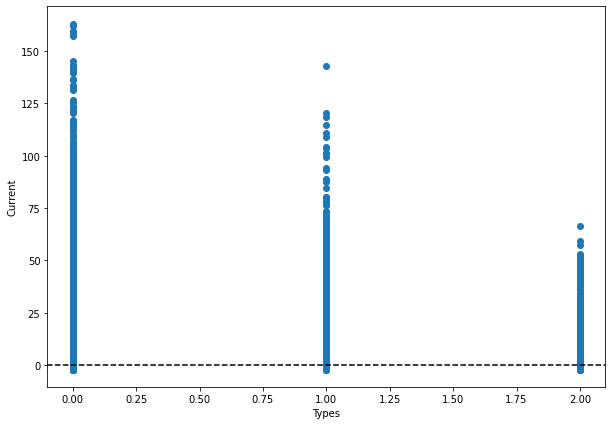

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
scatter = ax.scatter(x = dataset_2["Defect"],
                     y = dataset_2["Current"])
plt.axhline(0, c='black', ls='--')
ax.set(ylabel = "Current",
       xlabel = "Types")
plt.show()

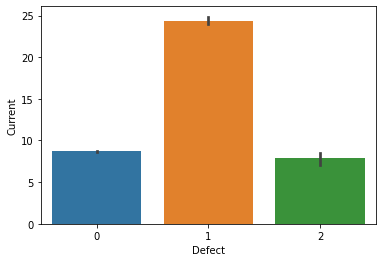

In [ ]:
sns.barplot(data=dataset_2, x="Defect", y="Current")

### ***Defect vs Current visualization using BoxPlot***

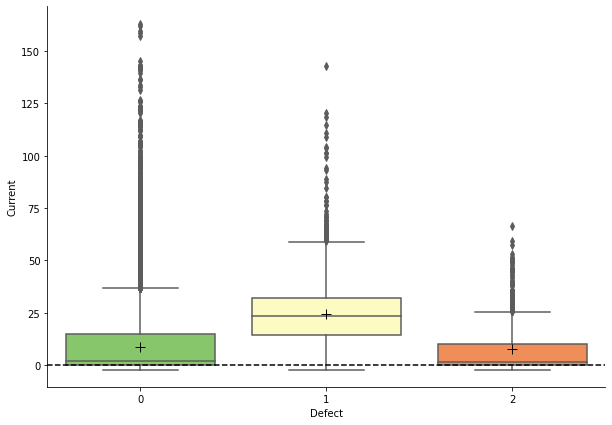

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
sns.boxplot(x ="Defect", y ='Current', data = dataset_2,palette ='RdYlGn_r' , showmeans = True,
            saturation = 0.9,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.axhline(0, c='black', ls='--')
sns.set_style('whitegrid')
sns.despine()

### ***Defect vs Humidity visualization***

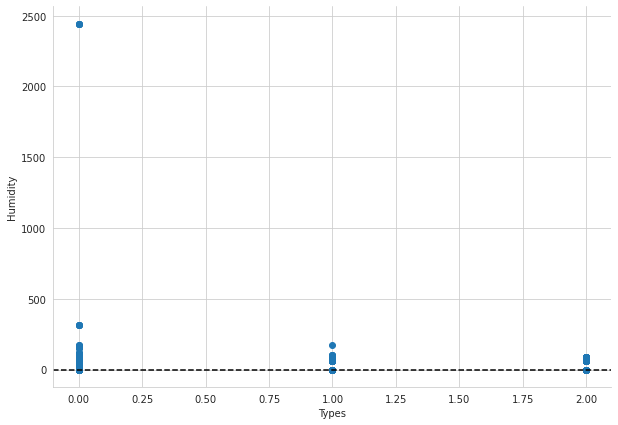

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
scatter = ax.scatter(x = dataset_2["Defect"],
                     y = dataset_2["Humidity"])
plt.axhline(0, c='black', ls='--')
ax.set(ylabel = "Humidity",
       xlabel = "Types")
sns.despine()
plt.show()

### ***Defect vs Flow visualization***

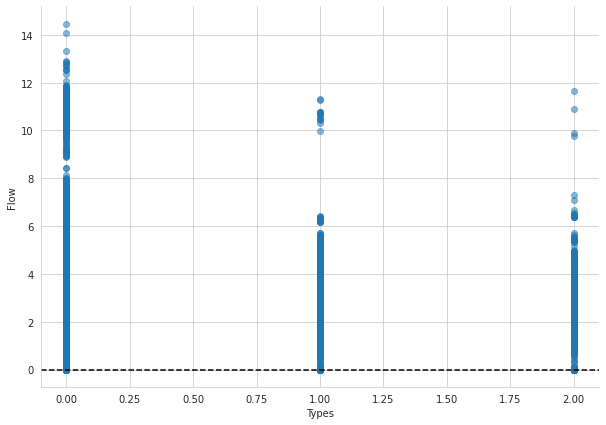

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
scatter = ax.scatter(x = dataset_2["Defect"],
                     y = dataset_2["Flow"],
                     alpha = 0.5)
plt.axhline(0, c='black', ls='--')
ax.set(ylabel = "Flow",
       xlabel = "Types")
sns.despine()
plt.show()

### ***Defect vs Voltage visualization****

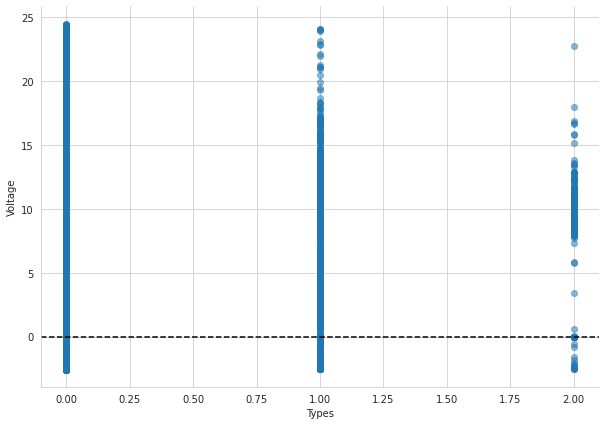

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
scatter = ax.scatter(x = dataset_2["Defect"],
                     y = dataset_2["Voltage"],
                     alpha = 0.5)
plt.axhline(0, c='black', ls='--')


ax.set(ylabel = "Voltage",
       xlabel = "Types")
sns.despine()
plt.show()

### ***Defect vs Temperature visualization***

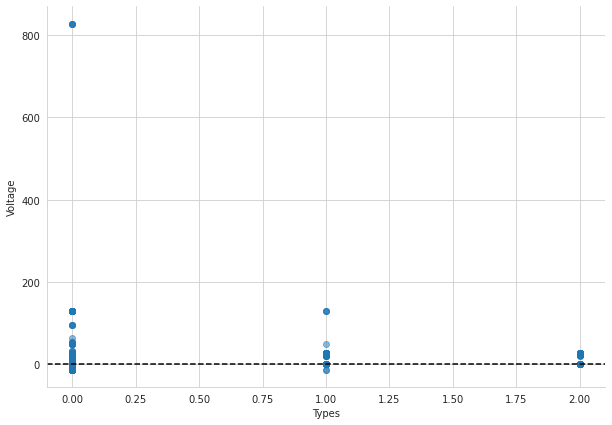

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
scatter = ax.scatter(x = dataset_2["Defect"],
                     y = dataset_2["Temperature"],
                     alpha = 0.5)
plt.axhline(0, c='black', ls='--')


ax.set(ylabel = "Voltage",
       xlabel = "Types")
sns.despine()
plt.show()

### ***Defect vs Job Temperature visualization***

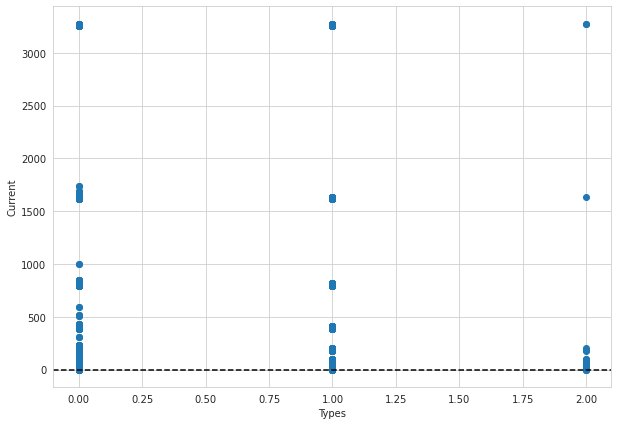

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
scatter = ax.scatter(x = dataset_2["Defect"],
                     y = dataset_2["Job Temp"])
plt.axhline(0, c='black', ls='--')
ax.set(ylabel = "Current",
       xlabel = "Types")
plt.show()

# **REMOVING OUTLIERS**

In [ ]:
#Shape of data before removing the outliers
dataset_2.shape

(696609, 13)

In [ ]:
remove= dataset_2[(dataset_2['Current']>=145)].index
dataset_2.drop(remove , inplace=True)
print(dataset_2.shape)

(696603, 13)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
remove2= dataset_2[(dataset_2['Humidity']>=200)].index
dataset_2.drop(remove2 , inplace=True)
print(dataset_2.shape)

(696595, 13)


In [ ]:
remove3= dataset_2[(dataset_2['Job Temp']>=1900)].index
dataset_2.drop(remove3 , inplace=True)
print(dataset_2.shape)

(694251, 13)


In [ ]:
remove4= dataset_2[(dataset_2['Flow']>=12)].index
dataset_2.drop(remove4 , inplace=True)
print(dataset_2.shape)

(694238, 13)


In [ ]:
remove5= dataset_2[(dataset_2['Temperature']>=100)].index
dataset_2.drop(remove5 , inplace=True)
print(dataset_2.shape)

(694072, 13)


In [ ]:
dataset_2.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,382617,TWLD23,E15002965,240,10-09-2022,7:32:28:527,1.13,74,23,0.01,29.3,15.2,0
2,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:40,1.82,74,23,0.00,29.3,0.0,1
3,382617,TWLD23,E15002965,240,10-09-2022,7:32:29:677,2.91,74,23,0.00,29.3,0.0,0
4,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:166,0.04,74,23,0.00,29.3,0.0,0
5,382617,TWLD23,E15002965,240,10-09-2022,7:32:30:696,2.51,74,23,0.00,27.8,0.0,0


In [ ]:
#Corelation matrix
dataset_2.corr()

,Employee Code,Order Operation No,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
Employee Code,1.000000,0.420951,-0.045730,-0.079854,-0.038154,0.067938,0.012070,-0.006728,0.004218
Order Operation No,0.420951,1.000000,-0.045101,-0.121942,-0.035064,-0.155534,0.040223,-0.010825,0.008095
Current,-0.045730,-0.045101,1.000000,-0.007047,-0.013504,0.092373,0.075049,0.736192,0.062652
Humidity,-0.079854,-0.121942,-0.007047,1.000000,0.708033,0.026637,-0.032443,-0.038125,-0.008716
Temperature,-0.038154,-0.035064,-0.013504,0.708033,1.000000,-0.016326,-0.018419,-0.042228,-0.007355
Flow,0.067938,-0.155534,0.092373,0.026637,-0.016326,1.000000,0.011129,0.096955,-0.003013
Job Temp,0.012070,0.040223,0.075049,-0.032443,-0.018419,0.011129,1.000000,0.094921,0.047956
Voltage,-0.006728,-0.010825,0.736192,-0.038125,-0.042228,0.096955,0.094921,1.000000,0.049007
Defect,0.004218,0.008095,0.062652,-0.008716,-0.007355,-0.003013,0.047956,0.049007,1.000000


In [ ]:
#Shape of data after removing the outliers
dataset_2.shape

(694072, 13)

# **MODEL TRAINING**

In [ ]:
X=dataset_2.drop(columns=['Defect','Time', 'Employee Code', 'Machine',
                          'Production', 'Date'], axis=1)
Y=dataset_2['Defect']

## **Train Test Split**

In [ ]:
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=42)

In [ ]:
X_train.shape, X_test.shape , Y_train.shape , Y_test.shape

((485850, 7), (208222, 7), (485850,), (208222,))

### **XGBoost Classifier**

In [ ]:
xgb_clf= xgb.XGBClassifier(max_depth=5, n_estimators=1500, learning_rate=0.2, n_jobs=-1)

In [ ]:
xgb_clf.fit(X_train, Y_train)

XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=1500, n_jobs=-1,
              objective='multi:softprob')

In [ ]:
accuracy_score(Y_test, xgb_clf.predict(X_test))

0.9934877198374812

In [ ]:
f1_score(Y_test, xgb_clf.predict(X_test), average='weighted')

0.9915336251759621

In [ ]:
print(classification_report(Y_test, xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    206693
           1       0.71      0.24      0.36      1235
           2       0.00      0.00      0.00       294

    accuracy                           0.99    208222
   macro avg       0.57      0.41      0.45    208222
weighted avg       0.99      0.99      0.99    208222



In [ ]:
print("Before OverSampling, counts of label '2': {}".format(sum(Y_train == 2)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(Y_train_res == 2)))
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

Before OverSampling, counts of label '2': 685
Before OverSampling, counts of label '1': 2881 

Before OverSampling, counts of label '0': 482284 

After OverSampling, the shape of train_X: (1446852, 7)
After OverSampling, the shape of train_y: (1446852,) 

After OverSampling, counts of label '2': 482284
After OverSampling, counts of label '1': 482284
After OverSampling, counts of label '0': 482284


In [ ]:
xgb_clf2= xgb.XGBClassifier(max_depth=8, n_estimators=2500, learning_rate=0.2, n_jobs=-1)

In [ ]:
xgb_clf2.fit(X_train_res, Y_train_res.ravel())

XGBClassifier(learning_rate=0.2, max_depth=8, n_estimators=2500, n_jobs=-1,
              objective='multi:softprob')

In [ ]:
Y_pred=xgb_clf2.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.91    206693
           1       0.08      0.50      0.14      1235
           2       0.00      0.11      0.00       294

    accuracy                           0.84    208222
   macro avg       0.36      0.48      0.35    208222
weighted avg       0.99      0.84      0.91    208222



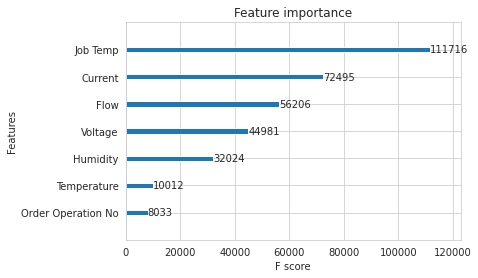

In [ ]:
xgb.plot_importance(xgb_clf2)

In [ ]:
mean_absolute_percentage_error(Y_test, Y_pred)

1220536881655850.2

In [ ]:
f1_score(Y_test, Y_pred, average='weighted')

0.9087549742854942

**CODES TO SAVE MODEL IN DIFFERENT FORMATS**

In [ ]:
# import pickle
# pickle.dump(xgb_clf2, open('WeldRight_model.pkl','wb'))

In [ ]:
# with open('model_pkl', 'wb') as files:
#     pickle.dump(xgb_clf2, files)

In [ ]:
# import xgboost as xgb

In [ ]:
# from xgboost.plotting import Booster
# xgb_clf2.save_model('model.json')

In [ ]:
# xgb_clf2.save_model("Saved_WeldRight_model.h5")

In [ ]:
# xgb_clf2 .save_model("model.json")

In [ ]:
# xgb_clf2.save_model('WeldRight_SavedModel_format')